In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt   
import tensorflow as tf  

2022-09-11 01:26:42.534582: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-11 01:26:42.534641: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
X_data_refl = np.load(f'data/USA_8states_data_MOD09A1.npz')
X_data_temp = np.load(f'data/USA_8states_data_MYD11A2.npz')
useful_bands_refl = X_data_refl['X'][:,:,:,:,:]
useful_bands_temp = X_data_temp['X'][:,:,:,:,[0,1,2,3,8,9]]

In [4]:
useful_bands_refl.shape # [0,1,2,3,8,9]

(18, 8, 46, 30, 7)

In [5]:
useful_bands_temp.shape # [0,1,2,3,8,9]

(18, 8, 46, 30, 6)

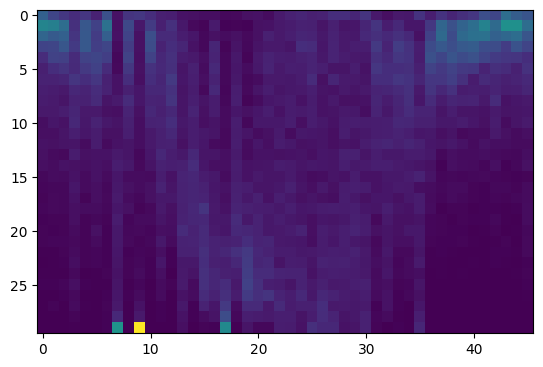

In [49]:
plt.imshow(useful_bands_refl[0,0,:,:,4].T);

In [6]:
X_data = tf.concat([useful_bands_refl, useful_bands_temp], 4)
X_data.shape

2022-09-11 01:26:48.235064: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-11 01:26:48.235104: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-11 01:26:48.235120: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (HA-Desktop): /proc/driver/nvidia/version does not exist
2022-09-11 01:26:48.235338: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorShape([18, 8, 46, 30, 13])

In [11]:
X_data_a = np.load(f'data/USA_other_states_data_MOD09A1_a.npz')
X_a = X_data_a['X']
X_data_b = np.load(f'data/USA_other_states_data_MOD09A1_b.npz')
X_b = X_data_b['X']
X_data_c = np.load(f'data/USA_other_states_data_MOD09A1_c.npz')
X_c = X_data_c['X']
X_data_d = np.load(f'data/USA_other_states_data_MOD09A1_d.npz')
X_d = X_data_d['X']
X_data_e = np.load(f'data/USA_other_states_data_MOD09A1_e.npz')
X_e = X_data_e['X']
X_data_f = np.load(f'data/USA_other_states_data_MOD09A1_f.npz')
X_f = X_data_f['X']
X_data_g = np.load(f'data/USA_other_states_data_MOD09A1_g.npz')
X_g = X_data_g['X']
X_data_h = np.load(f'data/USA_other_states_data_MOD09A1_h.npz')
X_h = X_data_h['X']
X_data = tf.concat([X_a, X_b, X_c, X_d, X_e, X_f, X_g, X_h], 1)
X_data.shape

TensorShape([19, 30, 46, 30, 13])

In [10]:

np.savez_compressed('data/USA_all_states_data_MOD09A1', X=X_data, 
                    county_names= ['Delaware', 'District of Columbia', 'Florida', 'Hawaii', 'Idaho', 'Iowa', 
                                   'Kansas', 'Kentucky', 'Louisiana', 'Maryland', 
                                   'Michigan', 'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 
                                   'New Hampshire', 'New Jersey', 'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania', 'Rhode Island'
                                   'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'Wisconsin', 'Wyoming'] )